In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

import shutil

source = '/kaggle/input/cyc2cyc-rerun/checkpoints/train'
destination = '/kaggle/working/prev_input'

shutil.copytree(source, destination)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/cyc2cyc-rerun/checkpoints/train'

In [2]:
clean_objects = pd.read_csv("/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train.csv")
clean_objects.head()

image_name             annotation
0  00001.jpg                    NaN
1  00002.jpg                    NaN
2  00003.jpg                    NaN
3  00004.jpg                    NaN
4  00005.jpg  0 2076 1559 2369 1695

In [3]:
clean_objects = clean_objects[clean_objects['annotation'].isnull()]
clean_objects.drop(['annotation'],inplace=True,axis=1)

In [4]:
clean_objects.reset_index(inplace=True,drop=True)
clean_objects.head()

image_name
0  00001.jpg
1  00002.jpg
2  00003.jpg
3  00004.jpg
4  00018.jpg

In [5]:
# prefix = "/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train/"

# def prepend_string(prefix, original_string):
#     return f"{prefix}{original_string}"

# clean_objects['image_name'] = clean_objects['image_name'].apply(lambda x: prepend_string(prefix, x))

In [6]:
clean_objects['image_name'] = '/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train/' + clean_objects['image_name']

In [7]:
clean_objects.head()

image_name
0  /kaggle/input/foreign-objects-in-chest-xrays/o...
1  /kaggle/input/foreign-objects-in-chest-xrays/o...
2  /kaggle/input/foreign-objects-in-chest-xrays/o...
3  /kaggle/input/foreign-objects-in-chest-xrays/o...
4  /kaggle/input/foreign-objects-in-chest-xrays/o...

In [8]:
clean_objects.to_csv('/kaggle/working/clean_objects.csv',index=False)

In [2]:
objects = pd.read_csv('/kaggle/input/chexpert/train.csv')
objects.head()

NameError: name 'pd' is not defined

In [10]:
objects = objects[(objects['Frontal/Lateral']=='Frontal') & (objects['Support Devices']==1.0)]
objects.head()

Path     Sex  Age  \
0   CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
7   CheXpert-v1.0-small/train/patient00005/study1/...    Male   33   
12  CheXpert-v1.0-small/train/patient00007/study1/...    Male   69   
13  CheXpert-v1.0-small/train/patient00007/study2/...    Male   69   
14  CheXpert-v1.0-small/train/patient00008/study1/...    Male   81   

   Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
0          Frontal    AP         1.0                         NaN   
7          Frontal    PA         1.0                         NaN   
12         Frontal    AP         NaN                         NaN   
13         Frontal    AP         NaN                         1.0   
14         Frontal    AP         NaN                         NaN   

    Cardiomegaly  Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  \
0            NaN           NaN          NaN    NaN            NaN        NaN   
7            0.0           NaN          NaN    NaN            0.0        NaN   
12           1.0           1.0          NaN    NaN            NaN        NaN   
13           NaN           1.0          NaN    NaN            NaN        NaN   
14           NaN           1.0          NaN    NaN            NaN        NaN   

    Atelectasis  Pneumothorax  Pleural Effusion  Pleural Other  Fracture  \
0           NaN           0.0               NaN            NaN       NaN   
7           NaN           NaN               0.0            NaN       NaN   
12          1.0           1.0               0.0            NaN       0.0   
13          1.0           0.0               0.0            NaN       0.0   
14          NaN           NaN               1.0            NaN       NaN   

    Support Devices  
0               1.0  
7               1.0  
12              1.0  
13              1.0  
14              1.0

In [11]:
objects.drop(columns=list(objects.iloc[:,1:].columns),inplace=True,axis=1)

In [1]:
objects.reset_index(inplace=True,drop=True)
objects

NameError: name 'objects' is not defined

In [13]:
objects['Path'] = objects['Path'].str.replace('CheXpert-v1.0-small', '/kaggle/input/chexpert')

In [14]:
objects.head()

Path
0  /kaggle/input/chexpert/train/patient00001/stud...
1  /kaggle/input/chexpert/train/patient00005/stud...
2  /kaggle/input/chexpert/train/patient00007/stud...
3  /kaggle/input/chexpert/train/patient00007/stud...
4  /kaggle/input/chexpert/train/patient00008/stud...

In [15]:
directory = '/kaggle/input/support-devices/Support_devices/Chexpert_Support_devices_subset/new_data/'

image_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]

more_objects = pd.DataFrame(image_paths, columns=['Path'])

more_objects.head(5)

Path
0  /kaggle/input/support-devices/Support_devices/...
1  /kaggle/input/support-devices/Support_devices/...
2  /kaggle/input/support-devices/Support_devices/...
3  /kaggle/input/support-devices/Support_devices/...
4  /kaggle/input/support-devices/Support_devices/...

In [16]:
objects = pd.concat([more_objects, objects], ignore_index=True)

In [17]:
objects.head()

Path
0  /kaggle/input/support-devices/Support_devices/...
1  /kaggle/input/support-devices/Support_devices/...
2  /kaggle/input/support-devices/Support_devices/...
3  /kaggle/input/support-devices/Support_devices/...
4  /kaggle/input/support-devices/Support_devices/...

In [18]:
objects.to_csv('/kaggle/working/objects.csv',index=False)

In [19]:
!pip install -q git+https://github.com/tensorflow/examples.git

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

AUTOTUNE = tf.data.AUTOTUNE

2024-06-17 05:50:50.291312: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 05:50:50.291429: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 05:50:50.402490: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
objects_head = objects.head(4000)
clean_objects_head = clean_objects.head(4000)

In [22]:
objects_head['Path'][1]

'/kaggle/input/support-devices/Support_devices/Chexpert_Support_devices_subset/new_data/41999.jpg'

In [23]:
clean_objects_head['image_name'][1]

'/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train/00002.jpg'

In [24]:
import cv2
def get_image_info(image_path):
    """
    Returns the type of image (color or grayscale), the number of channels, and the size (width and height).
    Args:
        image_path (str): Path to the image file.
    Returns:
        tuple: A tuple containing the image type (str), the number of channels (int), the width (int), and the height (int).
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Get the number of channels
    num_channels = image.shape[2] if len(image.shape) > 2 else 1
    # Determine the image type based on the number of channels
    if num_channels == 3:
        image_type = "Color"
    elif num_channels == 1:
        image_type = "Grayscale"
    else:
        image_type = f"Unknown ({num_channels} channels)"
    # Get the image size (width and height)
    height, width = image.shape[:2]
    return image_type, num_channels, width, height
 
# Example usage
image_path = clean_objects_head['image_name'][5]
image_type, num_channels, width, height = get_image_info(image_path)
print(f"Image Type: {image_type}")
print(f"Number of Channels: {num_channels}")
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")

Image Type: Color
Number of Channels: 3
Width: 2392 pixels
Height: 2745 pixels


In [25]:
image_path = objects_head['Path'][5]
image_type, num_channels, width, height = get_image_info(image_path)
print(f"Image Type: {image_type}")
print(f"Number of Channels: {num_channels}")
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")

Image Type: Color
Number of Channels: 3
Width: 390 pixels
Height: 320 pixels


In [26]:
object_domain = list(objects_head['Path'])
len(object_domain)

4000

In [27]:
clean_object_domain = list(clean_objects_head['image_name'])
len(clean_object_domain)

4000

In [28]:
print(object_domain[0:5])
print('------------')
print(clean_object_domain[0:5])

['/kaggle/input/support-devices/Support_devices/Chexpert_Support_devices_subset/new_data/2008.jpg', '/kaggle/input/support-devices/Support_devices/Chexpert_Support_devices_subset/new_data/41999.jpg', '/kaggle/input/support-devices/Support_devices/Chexpert_Support_devices_subset/new_data/41943.jpg', '/kaggle/input/support-devices/Support_devices/Chexpert_Support_devices_subset/new_data/4969.jpg', '/kaggle/input/support-devices/Support_devices/Chexpert_Support_devices_subset/new_data/4772.jpg']
------------
['/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train/00001.jpg', '/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train/00002.jpg', '/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train/00003.jpg', '/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train/00004.jpg', '/kaggle/input/foreign-objects-in-chest-xrays/object-CXR/train/00018.jpg']


In [29]:
# Set the image dimensions
img_height = 256
img_width = 256

# Define the buffer size and batch size
buffer_size = 1000
batch_size = 1

In [30]:
import random
# Split the lists into training and test sets
random.seed(42)  # Set a seed for reproducibility
random.shuffle(object_domain)
random.shuffle(clean_object_domain)

train_size = int(0.8 * len(object_domain))  # Use 80% for training

In [31]:
train_size

3200

In [32]:
object_domain_train_images = object_domain[:train_size]
object_domain_test_images = object_domain[train_size:]

clean_object_domain_train_images = clean_object_domain[:train_size]
clean_object_domain_test_images = clean_object_domain[train_size:]


In [33]:
object_domain_train_images[0:5]

['/kaggle/input/chexpert/train/patient00757/study13/view1_frontal.jpg',
 '/kaggle/input/support-devices/Support_devices/Chexpert_Support_devices_subset/new_data/20966.jpg',
 '/kaggle/input/chexpert/train/patient01550/study3/view1_frontal.jpg',
 '/kaggle/input/chexpert/train/patient01547/study13/view1_frontal.jpg',
 '/kaggle/input/chexpert/train/patient01293/study1/view1_frontal.jpg']

In [34]:
# A = OBJECTS !
# B = NO OBJECTS !

# Create training datasets
train_dataset_object = tf.data.Dataset.from_tensor_slices(object_domain_train_images)
train_dataset_clean_object = tf.data.Dataset.from_tensor_slices(clean_object_domain_train_images)

# Create test datasets
test_dataset_object = tf.data.Dataset.from_tensor_slices(object_domain_test_images)
test_dataset_clean_object = tf.data.Dataset.from_tensor_slices(clean_object_domain_test_images)

In [35]:
train_dataset_object

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [36]:
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image = tf.cast(image, tf.float32) / 127.5 - 1.0 
    return image
 
def random_crop(image):
    cropped_image = tf.image.random_crop(image, size=[img_height, img_width, 3])
    return cropped_image
 
def random_jitter(image):
    image = tf.image.resize(image, [286, 286], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
 
    image = random_crop(image)
 
    image = tf.image.random_flip_left_right(image)
 
    return image
 
def preprocess_image_train(image_path):
    image = load_image(image_path)
    image = random_jitter(image)
    return image
 
def preprocess_image_test(image_path):
    image = load_image(image_path)
    return image
 
train_dataset_object = train_dataset_object.map(preprocess_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset_clean_object = train_dataset_clean_object.map(preprocess_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset_object = test_dataset_object.map(preprocess_image_test, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset_clean_object = test_dataset_clean_object.map(preprocess_image_test, num_parallel_calls=tf.data.experimental.AUTOTUNE)
 
train_dataset_object = train_dataset_object.cache().shuffle(buffer_size).batch(batch_size)
train_dataset_clean_object = train_dataset_clean_object.cache().shuffle(buffer_size).batch(batch_size)
test_dataset_object = test_dataset_object.cache().batch(batch_size)
test_dataset_clean_object = test_dataset_clean_object.cache().batch(batch_size)
 

In [37]:
sample_object = next(iter(train_dataset_object))
sample_no_object = next(iter(train_dataset_clean_object))

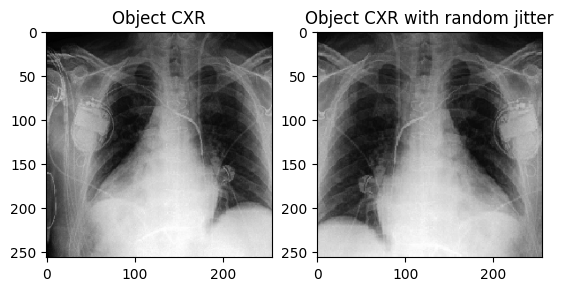

In [38]:
plt.subplot(121)
plt.title('Object CXR')
plt.imshow(sample_object[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Object CXR with random jitter')
plt.imshow(random_jitter(sample_object[0]) * 0.5 + 0.5)

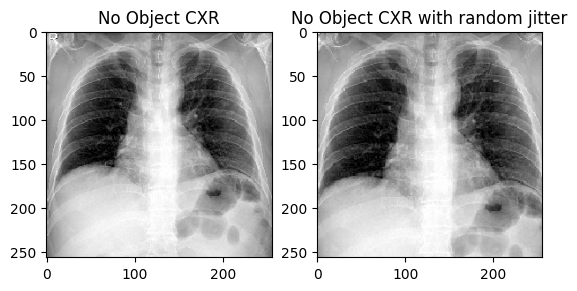

In [39]:
plt.subplot(121)
plt.title('No Object CXR')
plt.imshow(sample_no_object[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('No Object CXR with random jitter')
plt.imshow(random_jitter(sample_no_object[0]) * 0.5 + 0.5)

In [40]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

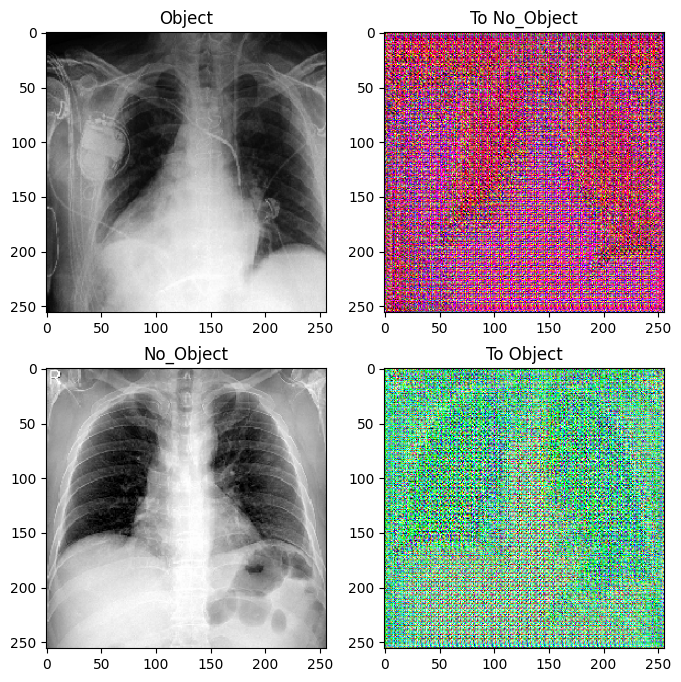

In [41]:
to_no_object = generator_g(sample_object)
to_object = generator_f(sample_no_object)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_object, to_no_object, sample_no_object, to_object]
title = ['Object', 'To No_Object', 'No_Object', 'To Object']

for i in range(len(imgs)):
  plt.subplot(2, 2, i+1)
  plt.title(title[i])
  if i % 2 == 0:
    plt.imshow(imgs[i][0] * 0.5 + 0.5)
  else:
    plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

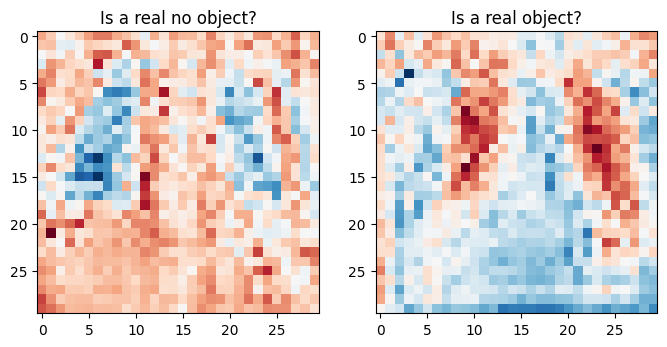

In [42]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real no object?')
plt.imshow(discriminator_y(sample_no_object)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real object?')
plt.imshow(discriminator_x(sample_object)[0, ..., -1], cmap='RdBu_r')

plt.show()

**Loss function**

In [43]:
LAMBDA = 10

In [44]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [45]:
def discriminator_loss(real, generated):
  real_loss = loss_obj(tf.ones_like(real), real)

  generated_loss = loss_obj(tf.zeros_like(generated), generated)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss * 0.5

In [46]:
def generator_loss(generated):
  return loss_obj(tf.ones_like(generated), generated)

In [47]:
def calc_cycle_loss(real_image, cycled_image):
  loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

  return LAMBDA * loss1

In [48]:
def identity_loss(real_image, same_image):
  loss = tf.reduce_mean(tf.abs(real_image - same_image))
  return LAMBDA * 0.5 * loss

In [49]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [50]:
checkpoint_path = "/kaggle/working/prev_input"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


**Model training**

In [51]:
EPOCHS = 50

In [52]:
def generate_images(model, test_input):
  prediction = model(test_input)

  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [53]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
  with tf.GradientTape(persistent=True) as tape:
    # Generator G translates X -> Y
    # Generator F translates Y -> X.

    fake_y = generator_g(real_x, training=True)
    cycled_x = generator_f(fake_y, training=True)

    fake_x = generator_f(real_y, training=True)
    cycled_y = generator_g(fake_x, training=True)

    # same_x and same_y are used for identity loss.
    same_x = generator_f(real_x, training=True)
    same_y = generator_g(real_y, training=True)

    disc_real_x = discriminator_x(real_x, training=True)
    disc_real_y = discriminator_y(real_y, training=True)

    disc_fake_x = discriminator_x(fake_x, training=True)
    disc_fake_y = discriminator_y(fake_y, training=True)

    # calculate the loss
    gen_g_loss = generator_loss(disc_fake_y)
    gen_f_loss = generator_loss(disc_fake_x)

    total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)

    # Total generator loss = adversarial loss + cycle loss
    total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
    total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

    disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
    disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

  # Calculate the gradients for generator and discriminator
  generator_g_gradients = tape.gradient(total_gen_g_loss, 
                                        generator_g.trainable_variables)
  generator_f_gradients = tape.gradient(total_gen_f_loss, 
                                        generator_f.trainable_variables)

  discriminator_x_gradients = tape.gradient(disc_x_loss, 
                                            discriminator_x.trainable_variables)
  discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                            discriminator_y.trainable_variables)

  # Apply the gradients to the optimizer
  generator_g_optimizer.apply_gradients(zip(generator_g_gradients, 
                                            generator_g.trainable_variables))

  generator_f_optimizer.apply_gradients(zip(generator_f_gradients, 
                                            generator_f.trainable_variables))

  discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))

  discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

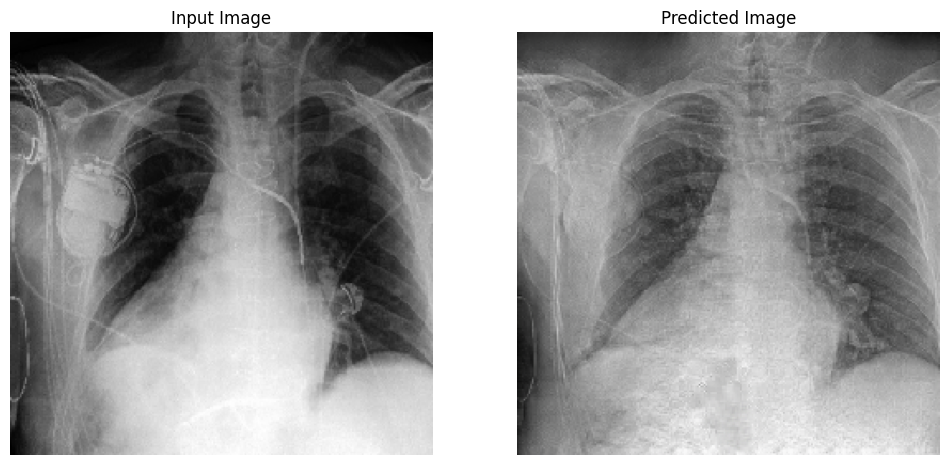

Saving checkpoint for epoch 50 at /kaggle/working/prev_input/ckpt-20
Time taken for epoch 50 is 809.4093573093414 sec



In [54]:
for epoch in range(EPOCHS):
  start = time.time()

  n = 0
  for image_x, image_y in tf.data.Dataset.zip((train_dataset_object, train_dataset_clean_object)):
    train_step(image_x, image_y)
    if n % 10 == 0:
      print ('.', end='')
    n += 1

  clear_output(wait=True)
  # Using a consistent image (sample_horse) so that the progress of the model
  # is clearly visible.
  generate_images(generator_g, sample_object)

  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))

  print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                      time.time()-start))

**GENERATING**

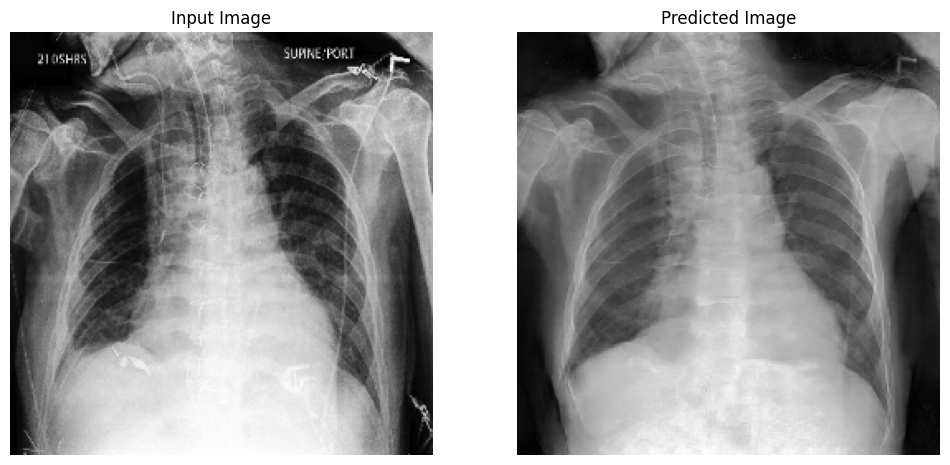

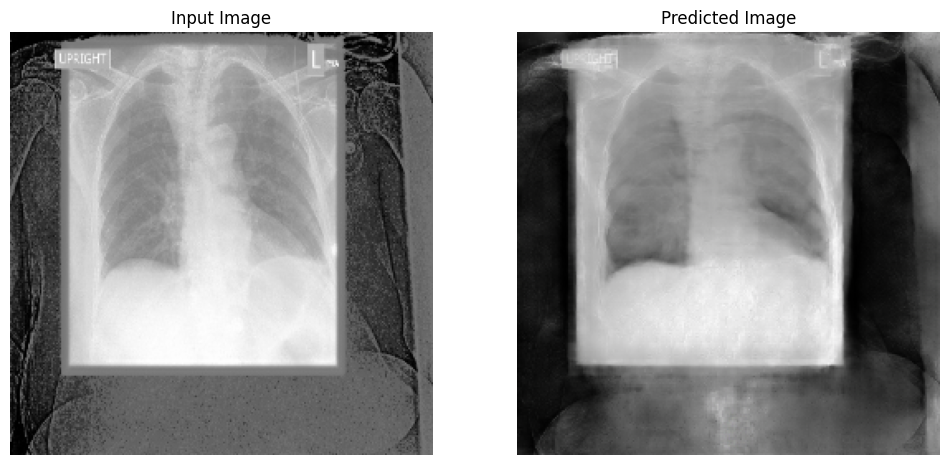

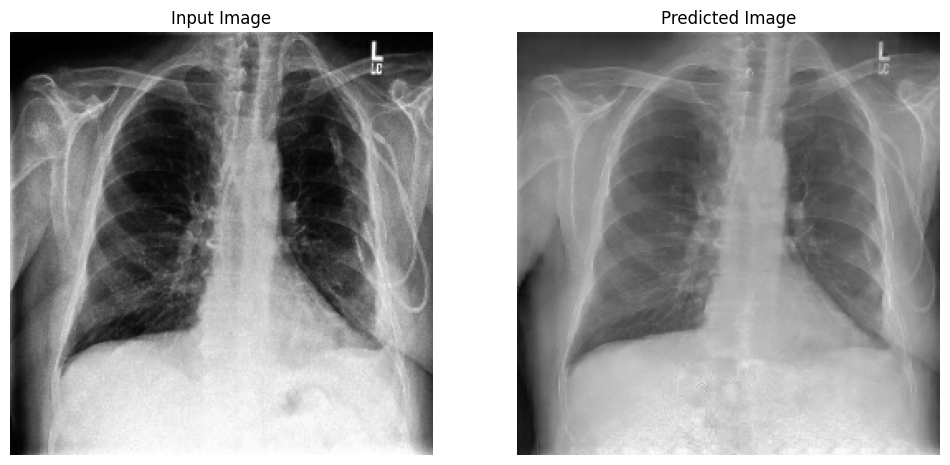

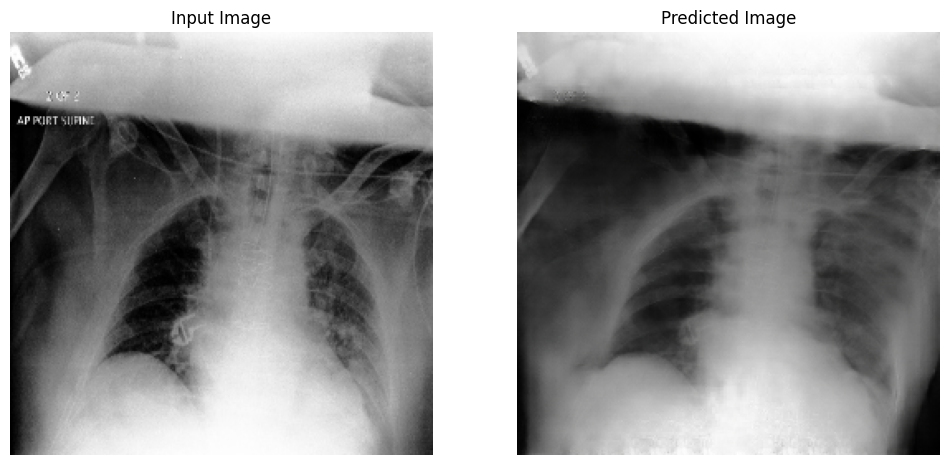

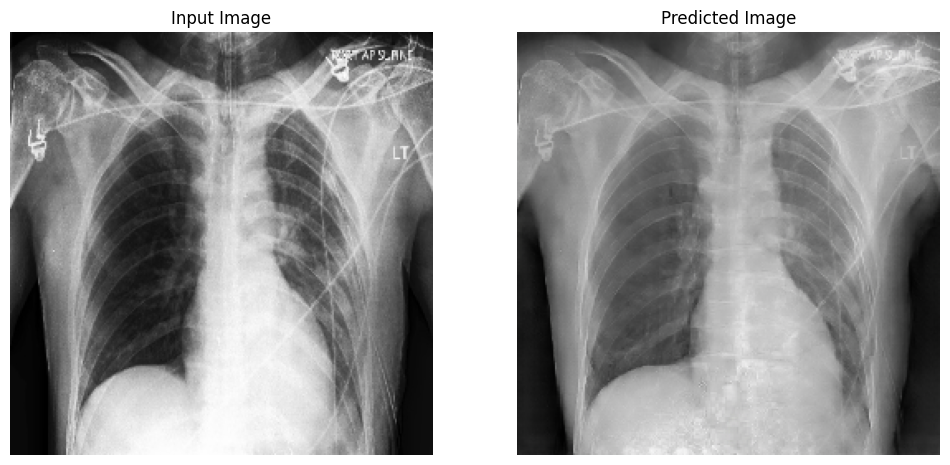

In [55]:
for inp in test_dataset_object.take(5):
  generate_images(generator_g, inp)

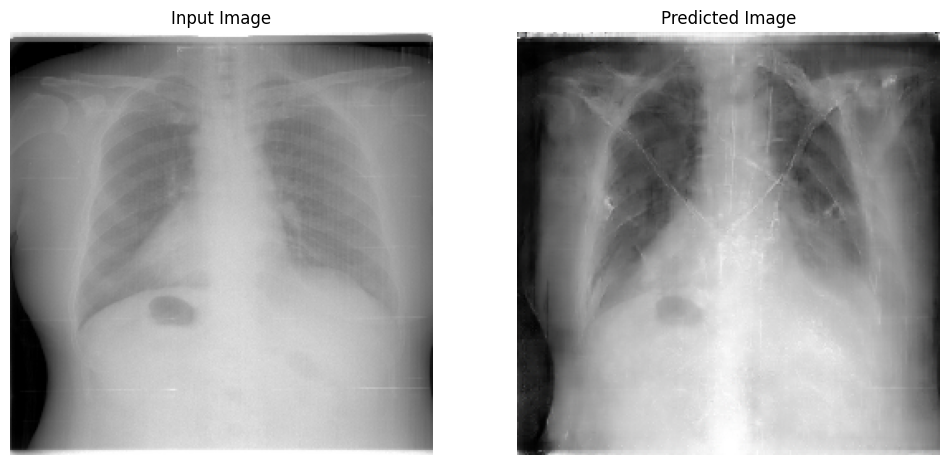

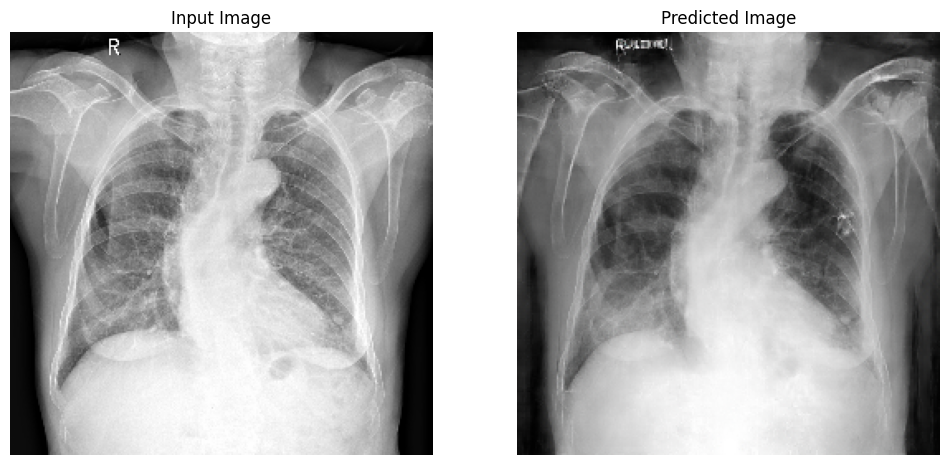

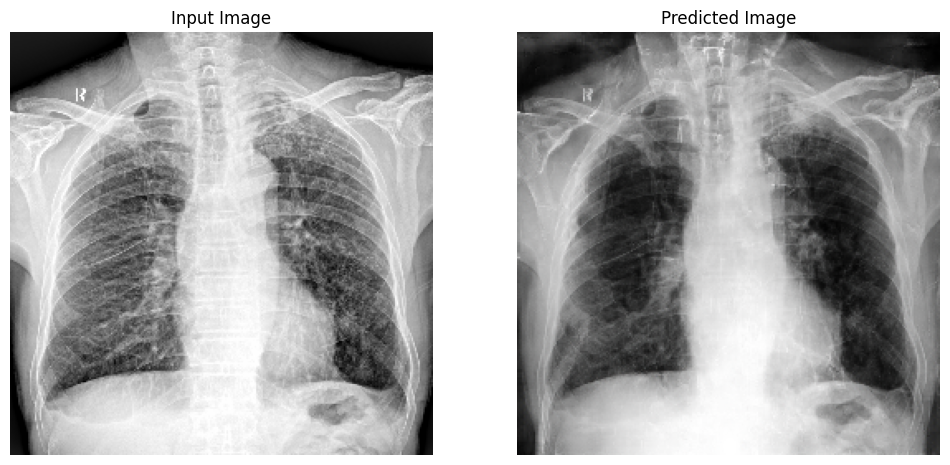

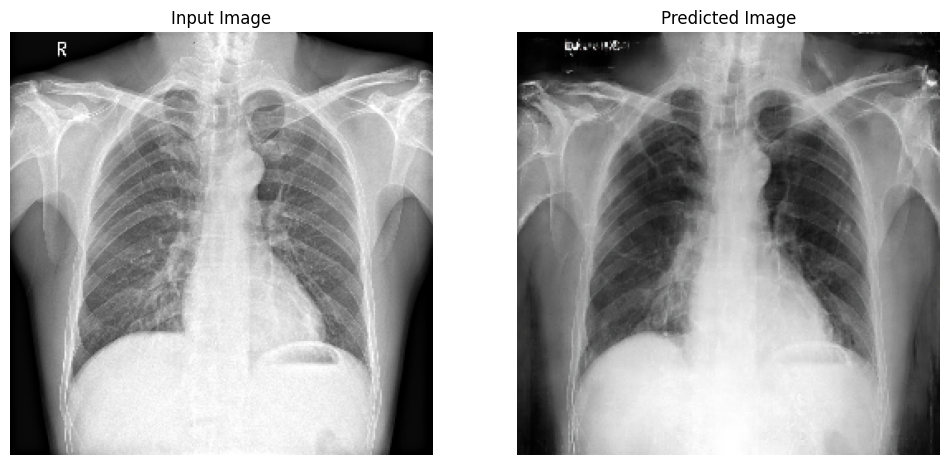

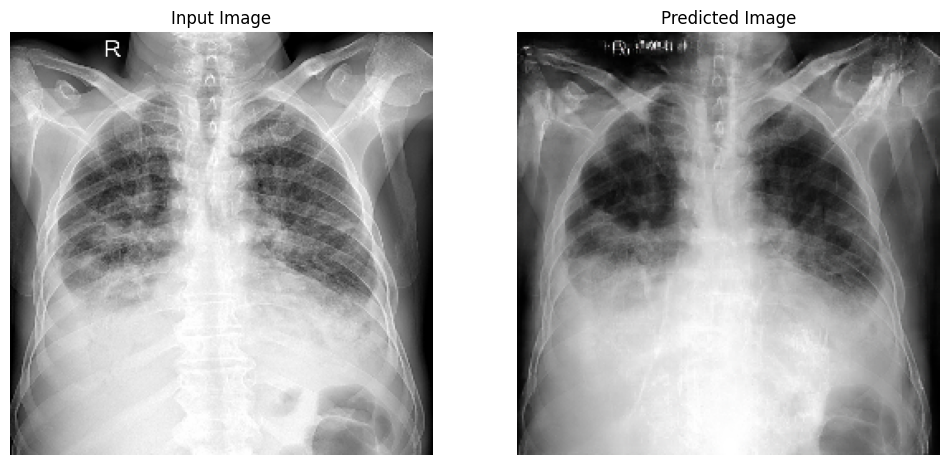

In [56]:
for inp in test_dataset_clean_object.take(5):
  generate_images(generator_f, inp)

In [57]:
# Save the generator models
generator_g.save('/kaggle/working/cyclegan_model_1/generator_g.h5')
generator_f.save('/kaggle/working/cyclegan_model_1/generator_f.h5')

# Save the discriminator models
discriminator_x.save('/kaggle/working/cyclegan_model_1/discriminator_x.h5')
discriminator_y.save('/kaggle/working/cyclegan_model_1/discriminator_y.h5')